<a href="https://colab.research.google.com/github/erickvaldezsallagos/SIMULACION-1/blob/main/PRUEBA_DE_FRECUENCIAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRUEBA DE FRECUENCIAS**

In [67]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import requests
import ast
import matplotlib.pyplot as plt
import tabulate

Importando los datos que vamos a ocupar

In [68]:
url = 'https://raw.githubusercontent.com/erickvaldezsallagos/SIMULACION-1/main/datos.txt' #Url de github en raw para llamarlo posteriormente

datos = pd.read_csv(url, header=None) #Obtiene los archivos del URL y se indica que no hay encabezados
datos = datos.dropna(axis=1, how='all') #Elimina columnas de NaN que se generan por default
datos

,0,1,2,3,4
0,0.78961,0.05230,0.10639,0.55877,0.14151
1,0.76086,0.12079,0.27738,0.65726,0.79269
2,0.80548,0.82654,0.29453,0.20852,0.42989
3,0.58518,0.98611,0.34488,0.34358,0.11537
4,0.89898,0.57880,0.67621,0.05010,0.00121
5,0.28269,0.73059,0.70119,0.18284,0.49962
6,0.38618,0.76910,0.68334,0.55170,0.10850
7,0.79882,0.45679,0.21631,0.87616,0.55743
8,0.58962,0.33216,0.03185,0.61168,0.09264
9,0.69623,0.17028,0.05475,0.91512,0.76262


Calculando las frecuencias:

In [69]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.01]

# Clasificar datos en intervalos
indices = np.digitize(datos, bins, right=False)

# Contar cuántos hay en cada intervalo
conteos = [(indices == i).sum() for i in range(1, len(bins))]

frecuencias, intervalos = np.histogram(datos, bins)

print("Frecuencias:", frecuencias)
print("Intervalo:", intervalos)

Frecuencias: [21 22 19 23 15]
Intervalo: [0.   0.2  0.4  0.6  0.8  1.01]


Tomando en cuenta lo anterior, generemos nuestra prueba de frecuencia

In [70]:
fe = datos.size / (len(intervalos) - 1)

table_data = []
for i in range(len(frecuencias)):
  f_o = frecuencias[i]
  f_e = fe
  chi_square_contribution = (f_o - f_e)**2 / f_o

  interval_str = f"[{intervalos[i]:.1f}, {intervalos[i+1]:.1f})"
  table_data.append([interval_str, f_o, f_e, chi_square_contribution])

encabezados = ["Intervalo", "F. Obs", "F. Esp", "(f_o - f_e)^2/f_o"]
print(tabulate.tabulate(table_data, headers=encabezados, tablefmt="psql", numalign="center"))

chi_sum = sum(item[3] for item in table_data)
print("El valor de chi:", chi_sum)


+-------------+----------+----------+---------------------+
| Intervalo   |  F. Obs  |  F. Esp  |  (f_o - f_e)^2/f_o  |
|-------------+----------+----------+---------------------|
| [0.0, 0.2)  |    21    |    20    |      0.047619       |
| [0.2, 0.4)  |    22    |    20    |      0.181818       |
| [0.4, 0.6)  |    19    |    20    |      0.0526316      |
| [0.6, 0.8)  |    23    |    20    |      0.391304       |
| [0.8, 1.0)  |    15    |    20    |       1.66667       |
+-------------+----------+----------+---------------------+
El valor de chi: 2.3400398228773516


Definiendo la funcion que hara la prueba:

In [71]:
def pdfrecuencias(data, intervalos, alpha):
  fe= datos.size/ (len(intervalos)-1)
  chi = np.sum((data-fe)**2/fe)
  print("El valor de chi cuadrada:", chi)
  v=len(intervalos)-2
  chi_0 = stats.chi2.ppf(1-alpha, v)
  print("El valor de chi cuadrada con los grados de libertad:", chi_0)
  if chi < chi_0:
    return print("No se rechaza la hipotesis")
  else:
    return print("Se rechaza la hipotesis")

Tomando $\alpha=0.05$ y llamando la funcion

In [72]:
pdfrecuencias(frecuencias, intervalos, 0.05)

El valor de chi cuadrada: 2.0
El valor de chi cuadrada con los grados de libertad: 9.487729036781154
No se rechaza la hipotesis


**HISTOGRAMA**

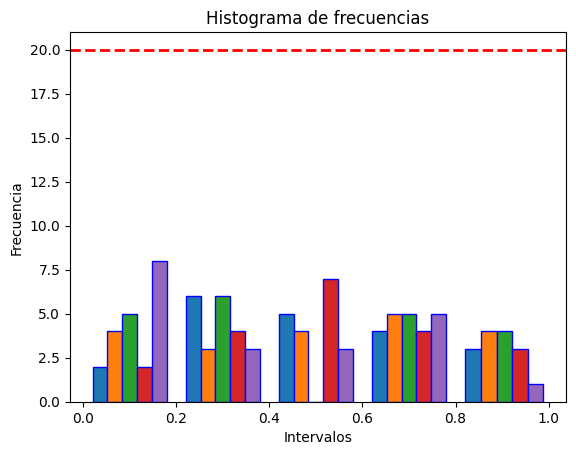

In [73]:
plt.hist(datos, bins=intervalos, edgecolor='blue')
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia")
plt.title("Histograma de frecuencias")
plt.axhline(y=fe, color='red', linestyle='--', linewidth=2)
plt.show()